## Technical – Matrix Completion

### Matrix Completion Using Low-Rank SVD

When diving into real-world datasets, especially in the intriguing world of healthcare finance, we often come across the pesky problem of missing data. To tackle this challenge, we decided to use a low-rank matrix completion method grounded in Singular Value Decomposition (SVD), following the handy steps outlined in Algorithm 12.1 from our coursework.

In our project, we worked with a dataset that included quarterly financial reports from hospitals across Washington State. This dataset featured important information such as operating revenue, net income, margins, and patient discharges. To prepare everything for analysis, we standardized the dataset to have a mean of zero and a standard deviation of one using StandardScaler. To make it more realistic, we simulated missing data by randomly masking 5% to 30% of the matrix values.

Here’s how we went about the matrix completion process:

1. **Initial Imputation:** First off, we filled in the missing values by replacing them with the average of their respective columns. This gave us a solid starting point.

2. **SVD Decomposition:** Next, we broke down the filled matrix using SVD, which we can express as X = U Σ Vᵗ. In this step, U and V are orthogonal matrices that represent the left and right singular vectors, while Σ is a diagonal matrix containing the singular values.

3. **Truncate to Rank-k:** Afterward, we imposed a low-rank structure by zeroing out all but the top k singular values in Σ. This allowed us to focus on the most significant components of the data.

4. **Reconstruction:** We then created a rank-k approximation of our original matrix by calculating X̂ = U_k Σ_k V_kᵗ. This step aimed at closely representing the original data while keeping things manageable.

5. **Update:** Finally, we updated the original matrix by filling in the masked entries in X with their corresponding values from X̂. This approach helped ensure our imputed values were both meaningful and accurate.

We repeated this process until our model converged or until we saw that the relative reconstruction error had leveled off. The beauty of this method lies in the assumption that the data usually has an underlying structure that can be captured by a few key components. This is especially true in the healthcare sector, where financial patterns often follow similar, predictable trends. It’s a fascinating way to make sense of data and fill in the gaps!

## Results: Performance of Matrix Completion Across Ranks and Missing Data

In this study, we took a closer look at how well matrix completion works by checking out the relative reconstruction error under different conditions:

- We tested various levels of missing data, starting from 5% and going up to 30%, to see how missing information affects results.
- We also explored different truncation ranks, from 1 to 8, to find out how rank impacts our ability to reconstruct the data.

To make sure our findings were reliable, we ran each experiment five times and averaged the results. The figure below shows how the reconstruction error changed with rank for each level of missing data:

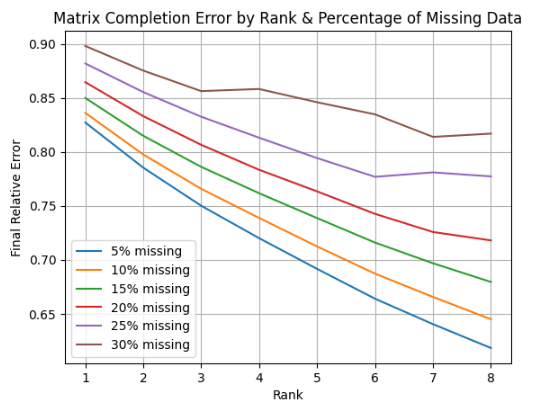


What we found is pretty interesting! As we increased the rank, the reconstruction error consistently went down, which tells us that higher-rank approximations are better at capturing the complexity of the data.

As expected, when there was more missing information, the final errors tended to be higher. However, we were pleased to see that ranks 6 to 8 performed the best, successfully picking up enough details to reconstruct the original matrix quite accurately.

Even when we faced a situation with 30% of the data missing, the reconstructions were still reasonably precise. This really supports the idea that the hospital financial data has a solid low-rank structure, which is great news!

Overall, this analysis encourages the use of low-rank models to help recover incomplete records in hospital reporting systems, especially in places or times where collecting data can be a bit hit or miss.


## Specific Criteria Discussion #2: Interpretation of U and V* in SVD

In the matrix decomposition given by X = U Σ Vᵗ, the matrices U and Vᵗ are like treasure maps that guide us through our dataset, revealing some pretty interesting insights:

**U (left singular vectors)**: Each row in U represents a specific hospital-quarter observation. Think of these vectors as a way to see how different hospitals reflect various underlying patterns in their financial behavior. For instance, some hospitals might really shine in areas marked by “high-profit margins,” which means they’re managing their resources well and making strong profits. Others may fall into the “expense-heavy” category, showing that they have higher operational costs, which can affect their bottom line.

**Vᵗ (right singular vectors)**: Each row of Vᵗ relates to an original feature, like net income, tax subsidies, or patient care metrics. These vectors help us understand how much each variable adds to each of the principal components, allowing us to interpret what each latent factor is really about. For example:

If we see that a component has high weights for Net_Income, Total_Margin, and Operating_Revenue, it’s likely pointing to a theme of financial stability and success—highlighting hospitals that are not just surviving but thriving.

Conversely, if we notice a component dominated by Medicare_Discharges and Accounts_Receivable_Medicaid, it could suggest a focus on providing services to government-funded patients, showing a commitment to care for underinsured populations.

In summary, U helps us find groups of similar hospital records, showcasing different financial behaviors, while Vᵗ offers insights into the themes that bring those groups together. This friendly interpretation process enhances our understanding of the data and is key to uncovering valuable, actionable insights from large financial datasets, ultimately helping guide better decision-making in the world of healthcare management.